<a href="https://www.kaggle.com/code/novaslaw/exploratory-data-analysis-on-gift-tape-dataset?scriptVersionId=138892231" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## Introduction

This notebook presents an exploratory data analysis (EDA) on the Gift and Tape dataset, which contains information about sales, orders, page views, number of buyers, and many more. The dataset is sourced from a Shopee e-commerce store that specializes in selling gift boxes and attracting gifts. The goal of this analysis is to uncover insights that could potentially increase profitability for the store.

## Objective
The main objectives of this EDA are:

1) Understand the structure and content of the dataset.
2) Identify any patterns, anomalies, or relationships in the data.
3) Prepare the data for further analysis and modeling.

## Methodology
The EDA will proceed in the following steps:

Data Exploration and Cleaning: We will start by loading the data and examining its structure. We will look at the number of rows/columns, check the data types of the columns, and look at some sample records. We will also check for missing values and decide how to handle them. We will also look for any outliers or inconsistencies in the data.

Data Visualization: We will create visualizations to understand the distribution of the data and the relationships between variables. This will include histograms, box plots, scatter plots, and correlation matrices.

Insights and Conclusions: We will summarize our findings and draw conclusions based on our analysis.


## Data Exploration and Cleaning

For the data exploration lets first import the necessary libraries and load the files needed for our EDA.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Comment this if the data visualisations doesn't work on your side
%matplotlib inline

plt.style.use('bmh')

Loading the Data: Use pandas to load the dataset from the file where it's stored. This will usually be a CSV or Excel file, but it could be a different format.

Viewing the Data: Take a look at the data to get a sense of what you're working with.

In [2]:
df = pd.read_csv('../input/gift-and-tape/giftandtape.shopee-shop-stats.csv')
df.head()

,Date,Weekday,Sales (MYR),Orders,Sales per Order,Page Views,Visitors,Conversion Rate (by paid order),Cancelled Orders,Cancelled Sales,Returned/Refunded Orders,Returned/Refunded Sales,# of buyers,# of new buyers,# of existing buyers,# of potential buyers,Repeat Purchase Rate
0,1/6/2021,3,1595.66,53,30.11,5505,2823,0.0177,4,157.16,0,0.0,50,44,6,165,0.0600
1,2/6/2021,4,1385.88,45,30.80,5616,2809,0.0146,4,140.45,0,0.0,41,36,5,209,0.0732
2,3/6/2021,5,1042.29,39,26.73,5208,2625,0.0141,1,16.80,0,0.0,37,34,3,170,0.0541
3,4/6/2021,6,880.15,33,26.67,5014,2360,0.0123,3,65.95,0,0.0,29,28,1,176,0.1034
4,5/6/2021,7,525.72,20,26.29,5009,2487,0.0080,0,0.00,0,0.0,20,19,1,184,0.0000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Date                             730 non-null    object 
 1   Weekday                          730 non-null    int64  
 2   Sales (MYR)                      730 non-null    float64
 3   Orders                           730 non-null    int64  
 4   Sales per Order                  730 non-null    float64
 5   Page Views                       730 non-null    int64  
 6   Visitors                         730 non-null    int64  
 7   Conversion Rate (by paid order)  730 non-null    float64
 8   Cancelled Orders                 730 non-null    int64  
 9   Cancelled Sales                  730 non-null    float64
 10  Returned/Refunded Orders         730 non-null    int64  
 11  Returned/Refunded Sales          730 non-null    float64
 12  # of buyers           

Let's rename the columns for more clarification.

In [4]:
df = df.rename(columns=
               {'Sales (MYR)': 'DailySales',
                'Sales per Order': 'SalesperOrder',
                'Page Views': 'PageViews',
                'Conversion Rate (by paid order)': 'ConversionRate',
                'Cancelled Orders': 'CancelledOrders',
                'Cancelled Sales': 'CancelledSales',
                'Returned/Refunded Orders': 'Returned/RefundedOrders',
                'Returned/Refunded Sales': 'Returned/RefundedSales',
                '# of buyers': '#ofbuyers',
                '# of new buyers': '#ofnewbuyers',
                '# of existing buyers': '#ofexistingbuyers',
                '# of potential buyers': '#ofpotentialbuyers',
                'Repeat Purchase Rate': 'RepeatPurchaseRate'})

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date                     730 non-null    object 
 1   Weekday                  730 non-null    int64  
 2   DailySales               730 non-null    float64
 3   Orders                   730 non-null    int64  
 4   SalesperOrder            730 non-null    float64
 5   PageViews                730 non-null    int64  
 6   Visitors                 730 non-null    int64  
 7   ConversionRate           730 non-null    float64
 8   CancelledOrders          730 non-null    int64  
 9   CancelledSales           730 non-null    float64
 10  Returned/RefundedOrders  730 non-null    int64  
 11  Returned/RefundedSales   730 non-null    float64
 12  #ofbuyers                730 non-null    int64  
 13  #ofnewbuyers             730 non-null    int64  
 14  #ofexistingbuyers        7

Descriptive Statistics: Get descriptive statistics that summarize the central tendency, dispersion, and shape of the dataset’s distribution.

In [6]:
df.describe()

,Weekday,DailySales,Orders,SalesperOrder,PageViews,Visitors,ConversionRate,CancelledOrders,CancelledSales,Returned/RefundedOrders,Returned/RefundedSales,#ofbuyers,#ofnewbuyers,#ofexistingbuyers,#ofpotentialbuyers,RepeatPurchaseRate
count,730.00000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,3.99863,386.783329,14.197260,28.064178,2064.228767,743.646575,0.019127,0.609589,16.166589,0.043836,1.322096,13.798630,12.553425,1.245205,93.132877,0.025054
std,1.99897,218.924377,7.826443,8.209121,871.679388,349.968293,0.007894,1.008695,29.818822,0.224058,10.637732,7.545872,7.100727,1.232342,39.479329,0.049660
min,1.00000,13.180000,1.000000,6.590000,521.000000,222.000000,0.002100,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,22.000000,0.000000
25%,2.00000,228.712500,9.000000,23.090000,1413.250000,524.000000,0.013300,0.000000,0.000000,0.000000,0.000000,8.000000,7.000000,0.000000,59.000000,0.000000
50%,4.00000,354.780000,13.000000,26.895000,2020.500000,706.500000,0.018450,0.000000,0.000000,0.000000,0.000000,13.000000,12.000000,1.000000,94.000000,0.000000
75%,6.00000,497.372500,19.000000,31.140000,2599.750000,890.000000,0.023800,1.000000,23.745000,0.000000,0.000000,18.000000,17.000000,2.000000,120.000000,0.037000
max,7.00000,1595.660000,56.000000,138.900000,5958.000000,2895.000000,0.049100,11.000000,197.940000,2.000000,252.400000,52.000000,47.000000,8.000000,238.000000,0.333300


Checking for Missing Values: It's important to check if the dataset has any missing values.

In [7]:
df.isnull().sum()

Date                       0
Weekday                    0
DailySales                 0
Orders                     0
SalesperOrder              0
PageViews                  0
Visitors                   0
ConversionRate             0
CancelledOrders            0
CancelledSales             0
Returned/RefundedOrders    0
Returned/RefundedSales     0
#ofbuyers                  0
#ofnewbuyers               0
#ofexistingbuyers          0
#ofpotentialbuyers         0
RepeatPurchaseRate         0
dtype: int64

Let us examine numerical features in the dataset

In [8]:
numeric_features = df.select_dtypes(include=[np.number])

numeric_features.columns

Index(['Weekday', 'DailySales', 'Orders', 'SalesperOrder', 'PageViews',
       'Visitors', 'ConversionRate', 'CancelledOrders', 'CancelledSales',
       'Returned/RefundedOrders', 'Returned/RefundedSales', '#ofbuyers',
       '#ofnewbuyers', '#ofexistingbuyers', '#ofpotentialbuyers',
       'RepeatPurchaseRate'],
      dtype='object')

Let us examine categorial features in the dataset

In [9]:
categorical_features = df.select_dtypes(include=[object])

categorical_features.columns

Index(['Date'], dtype='object')

From these informations we can already see all features are relevant in our exploratory analysis as there are no missing values. Plus there is so much features to analyse that it may be better to concentrate on the ones which can give us real insights. Let's just remove `Date` and change `Weekday` to string.

In [10]:
df.drop(['Date'],inplace=True,axis=1)
df['Weekday']= str(df['Weekday'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Weekday                  730 non-null    object 
 1   DailySales               730 non-null    float64
 2   Orders                   730 non-null    int64  
 3   SalesperOrder            730 non-null    float64
 4   PageViews                730 non-null    int64  
 5   Visitors                 730 non-null    int64  
 6   ConversionRate           730 non-null    float64
 7   CancelledOrders          730 non-null    int64  
 8   CancelledSales           730 non-null    float64
 9   Returned/RefundedOrders  730 non-null    int64  
 10  Returned/RefundedSales   730 non-null    float64
 11  #ofbuyers                730 non-null    int64  
 12  #ofnewbuyers             730 non-null    int64  
 13  #ofexistingbuyers        730 non-null    int64  
 14  #ofpotentialbuyers       7

## Data Visualization

Now lets take a look at how the Sales is distributed

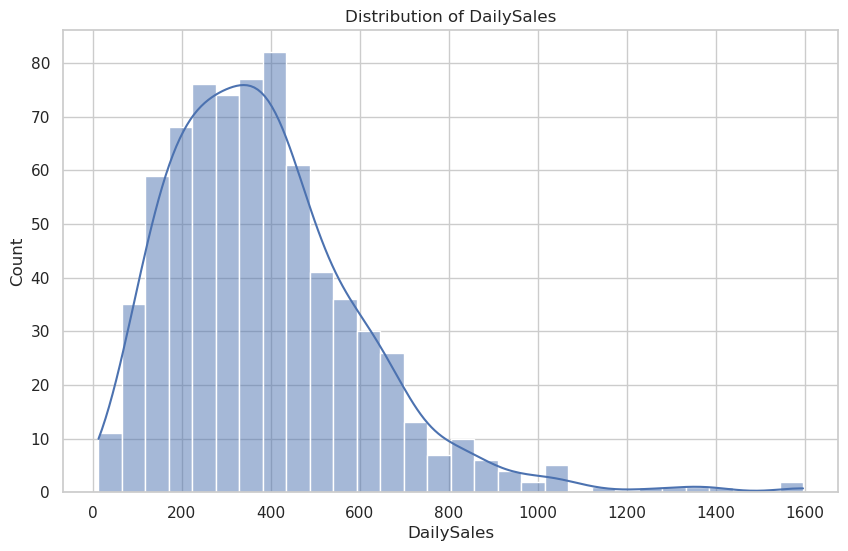

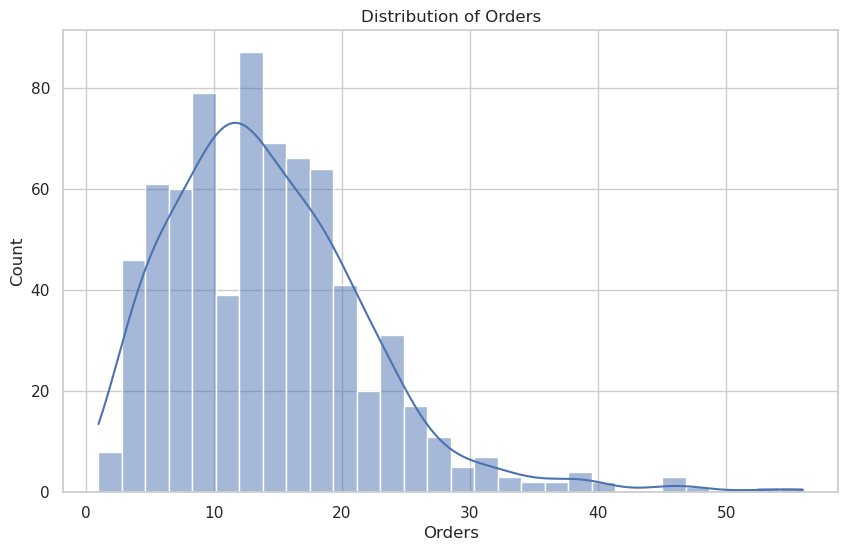

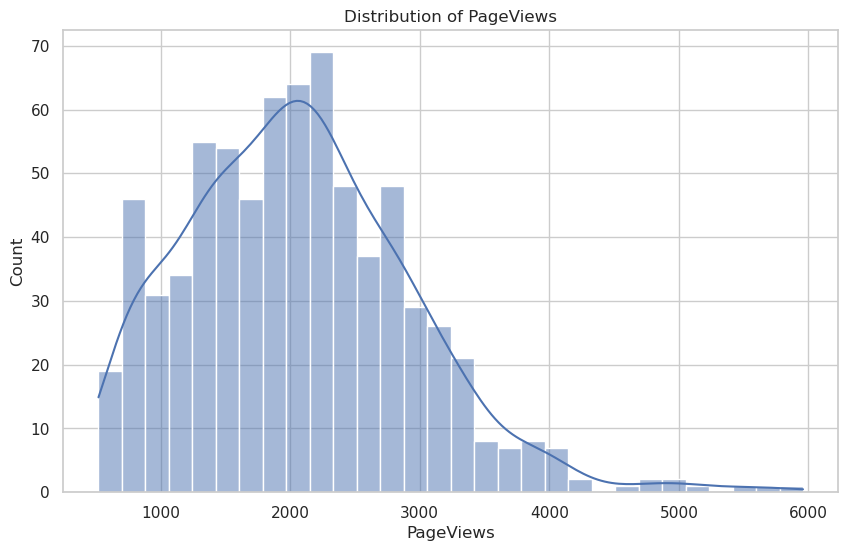

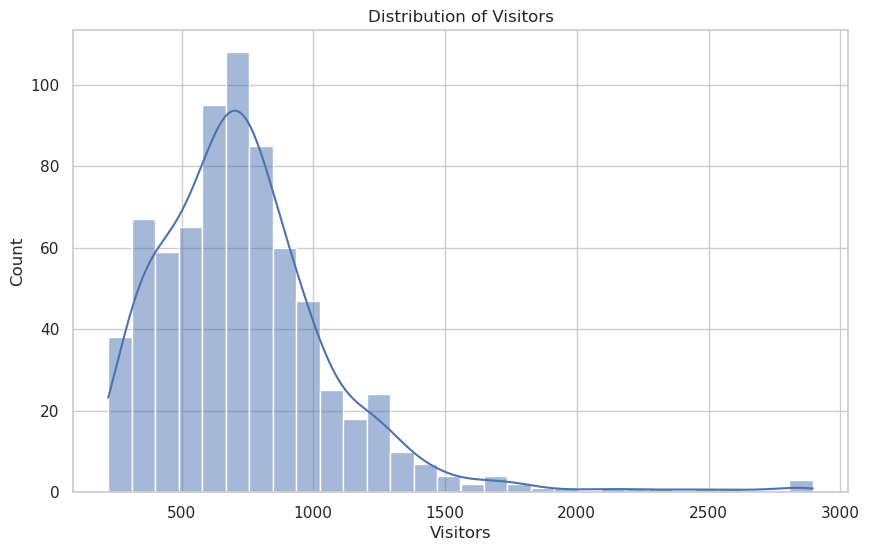

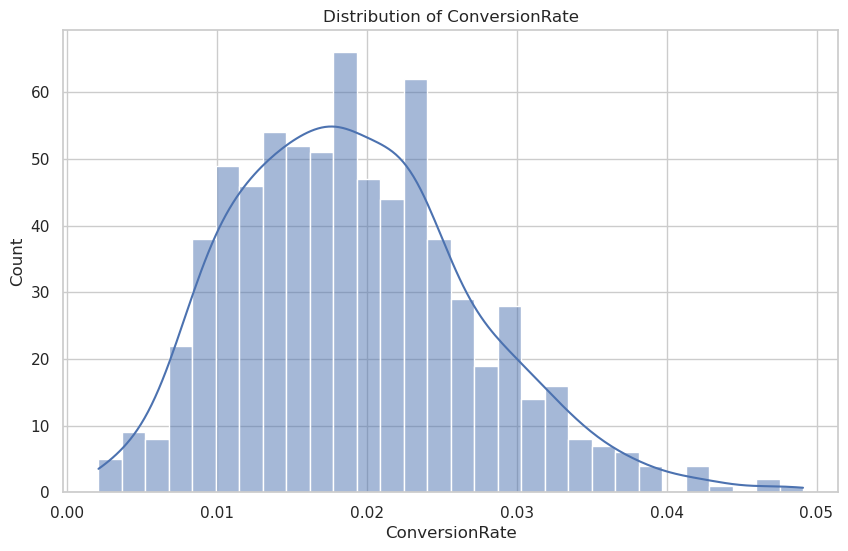

In [11]:
# Set the style of seaborn for our plots
sns.set(style="whitegrid")

# List of columns we're interested in
cols = ['DailySales', 'Orders', 'PageViews', 'Visitors', 'ConversionRate']

# Create a histogram for each column
for col in cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

DailySales: This distribution is positively skewed, with most of the daily sales amounts falling below 1,000 MYR. There are a few days with sales amounts exceeding 1,000 MYR, extending the tail of the distribution to the right.

Orders: This distribution is also positively skewed, with most of the days having fewer than 25 orders. Some days have more than 25 orders, which extends the tail of the distribution to the right.

PageViews: This distribution appears to be slightly positively skewed, with most days having fewer than 3,000 page views. However, the distribution is more evenly spread out than the previous two.

Visitors: This distribution is also slightly positively skewed, with most days having fewer than 1,000 visitors. Some days have more than 1,000 visitors, which extends the tail of the distribution to the right.

ConversionRate: This distribution is also positively skewed, with most of the conversion rates falling below 0.03. There are some days with conversion rates exceeding 0.03, which extends the tail of the distribution to the right.

## Outliers

Outliers can have a significant effect on your analysis, so it's essential to identify and deal with them appropriately. However, whether or not to remove outliers depends on the specific context and the goals of your analysis.

If an outlier represents a data entry error, it might be appropriate to remove it.
If an outlier is due to variability in your data (i.e., it's a "natural" outlier), you might want to keep it, as it's a legitimate part of the data and can provide valuable information.
If you're building a predictive model and an outlier represents a rare but important event (e.g., a rare disease in medical data), you might want to keep it, as removing it could decrease the model's ability to predict such events.
In this case, before deciding whether to remove outliers, we should first identify them. A common method to detect outliers is the IQR (interquartile range) method. Let's use this method to detect outliers for DailySales, Orders, PageViews, Visitors, and ConversionRate. Then we can decide what to do with them.

In [12]:
# Create a function to calculate the lower and upper bounds for outliers
def calculate_bounds(column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound, upper_bound

# Create a dictionary to store the bounds for each column
bounds = {}

# Calculate the bounds for each column
for col in cols:
    bounds[col] = calculate_bounds(col)

bounds

{'DailySales': (-174.27749999999995, 900.3625),
 'Orders': (-6.0, 34.0),
 'PageViews': (-366.5, 4379.5),
 'Visitors': (-25.0, 1439.0),
 'ConversionRate': (-0.0024500000000000043, 0.03955)}

Here are the lower and upper bounds for outliers in each of the selected columns:

DailySales: Any value below -174.28 or above 900.36 is considered an outlier.

Orders: Any value below -6 or above 34 is considered an outlier.

PageViews: Any value below -366.5 or above 4379.5 is considered an outlier.

Visitors: Any value below -25 or above 1439 is considered an outlier.

ConversionRate: Any value below -0.00245 or above 0.03955 is considered an outlier.

Since it doesn't make sense to have negative sales, orders, page views, visitors, or conversion rate, we can assume that the lower bounds for these outliers are 0.

Next, let's identify these outliers in our dataset. We'll mark them in the DataFrame and count how many outliers there are for each column. Based on that, we can decide how to handle them.

In [13]:
# Identify the outliers in the DataFrame
for col in cols:
    lower_bound, upper_bound = bounds[col]
    df[f'{col} Outlier'] = (df[col] < max(0, lower_bound)) | (df[col] > upper_bound)

# Count the number of outliers for each column
outlier_counts = {col: df[f'{col} Outlier'].sum() for col in cols}

outlier_counts


{'DailySales': 18,
 'Orders': 16,
 'PageViews': 9,
 'Visitors': 24,
 'ConversionRate': 8}

Here is the count of outliers for each column:

DailySales: 18 outliers

Orders: 16 outliers

PageViews: 9 outliers

Visitors: 24 outliers

ConversionRate : 8 outliers

Before deciding what to do with these outliers, it's helpful to visualize them. Let's create boxplots for each column, which is a common way to visualize outliers. Boxplots show the median, interquartile range, and potential outliers in a dataset.

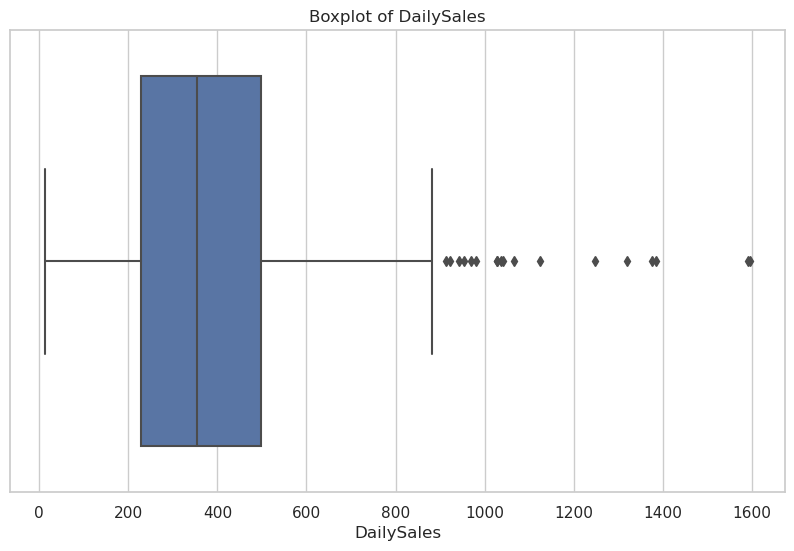

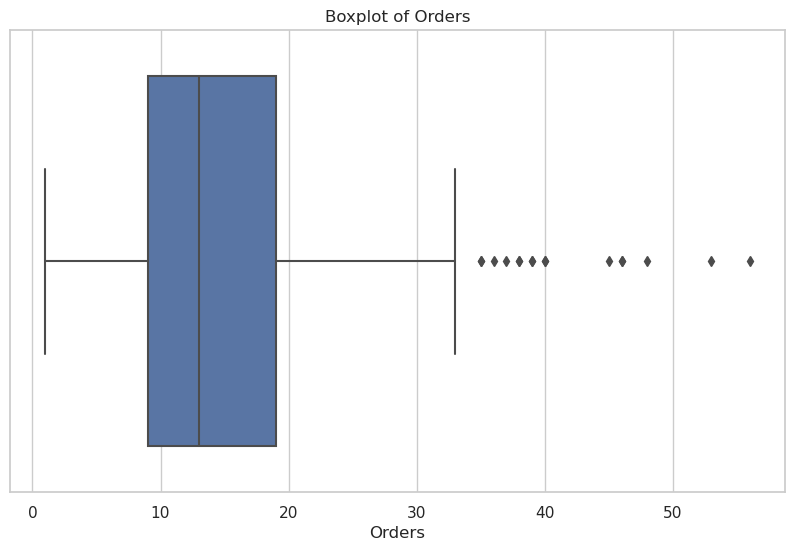

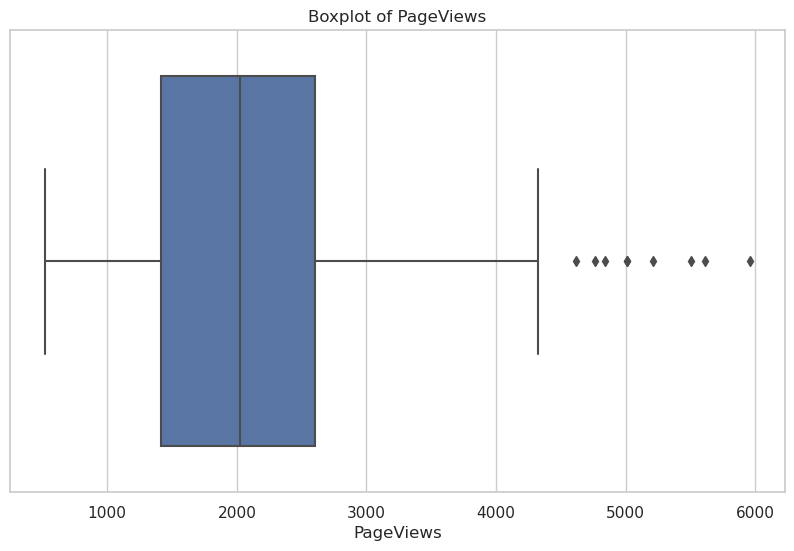

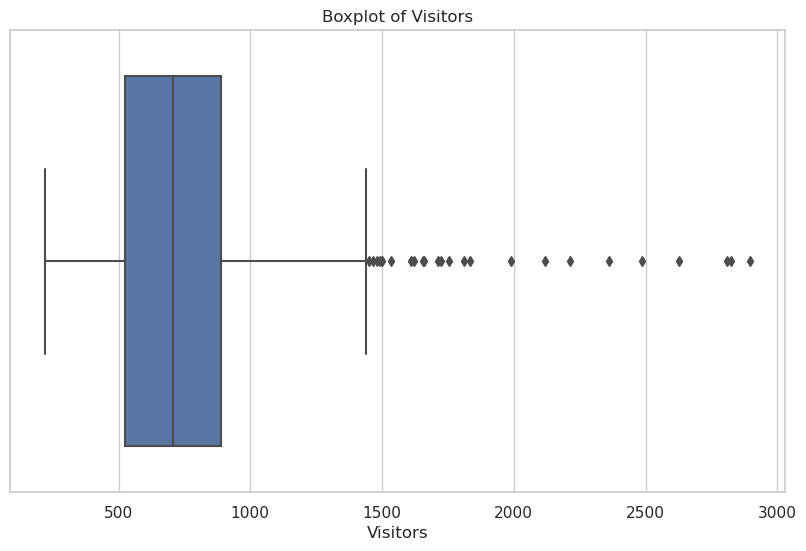

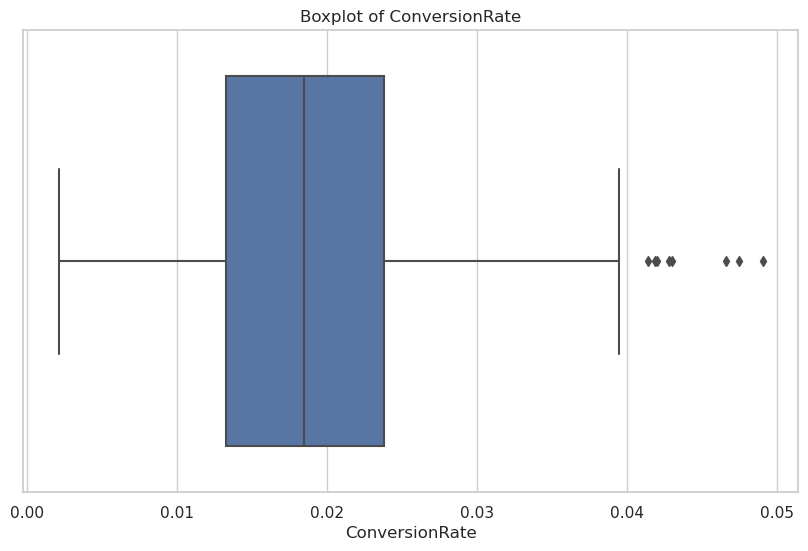

In [14]:
# Create a boxplot for each column
for col in cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


Outliers can contain valuable information and contribute to the overall understanding of the dataset's behavior. It's crucial, especially when these outliers are not due to measurement error or noise, but rather reflect actual variations in the data.

## Numerical data distribution

For this part lets look at the distribution of all of the features by ploting them

To do so lets first list all the types of our data from our dataset and take only the numerical ones:

In [15]:
list(set(df.dtypes.tolist()))
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.head()
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   DailySales               730 non-null    float64
 1   Orders                   730 non-null    int64  
 2   SalesperOrder            730 non-null    float64
 3   PageViews                730 non-null    int64  
 4   Visitors                 730 non-null    int64  
 5   ConversionRate           730 non-null    float64
 6   CancelledOrders          730 non-null    int64  
 7   CancelledSales           730 non-null    float64
 8   Returned/RefundedOrders  730 non-null    int64  
 9   Returned/RefundedSales   730 non-null    float64
 10  #ofbuyers                730 non-null    int64  
 11  #ofnewbuyers             730 non-null    int64  
 12  #ofexistingbuyers        730 non-null    int64  
 13  #ofpotentialbuyers       730 non-null    int64  
 14  RepeatPurchaseRate       7

Now lets plot them all:

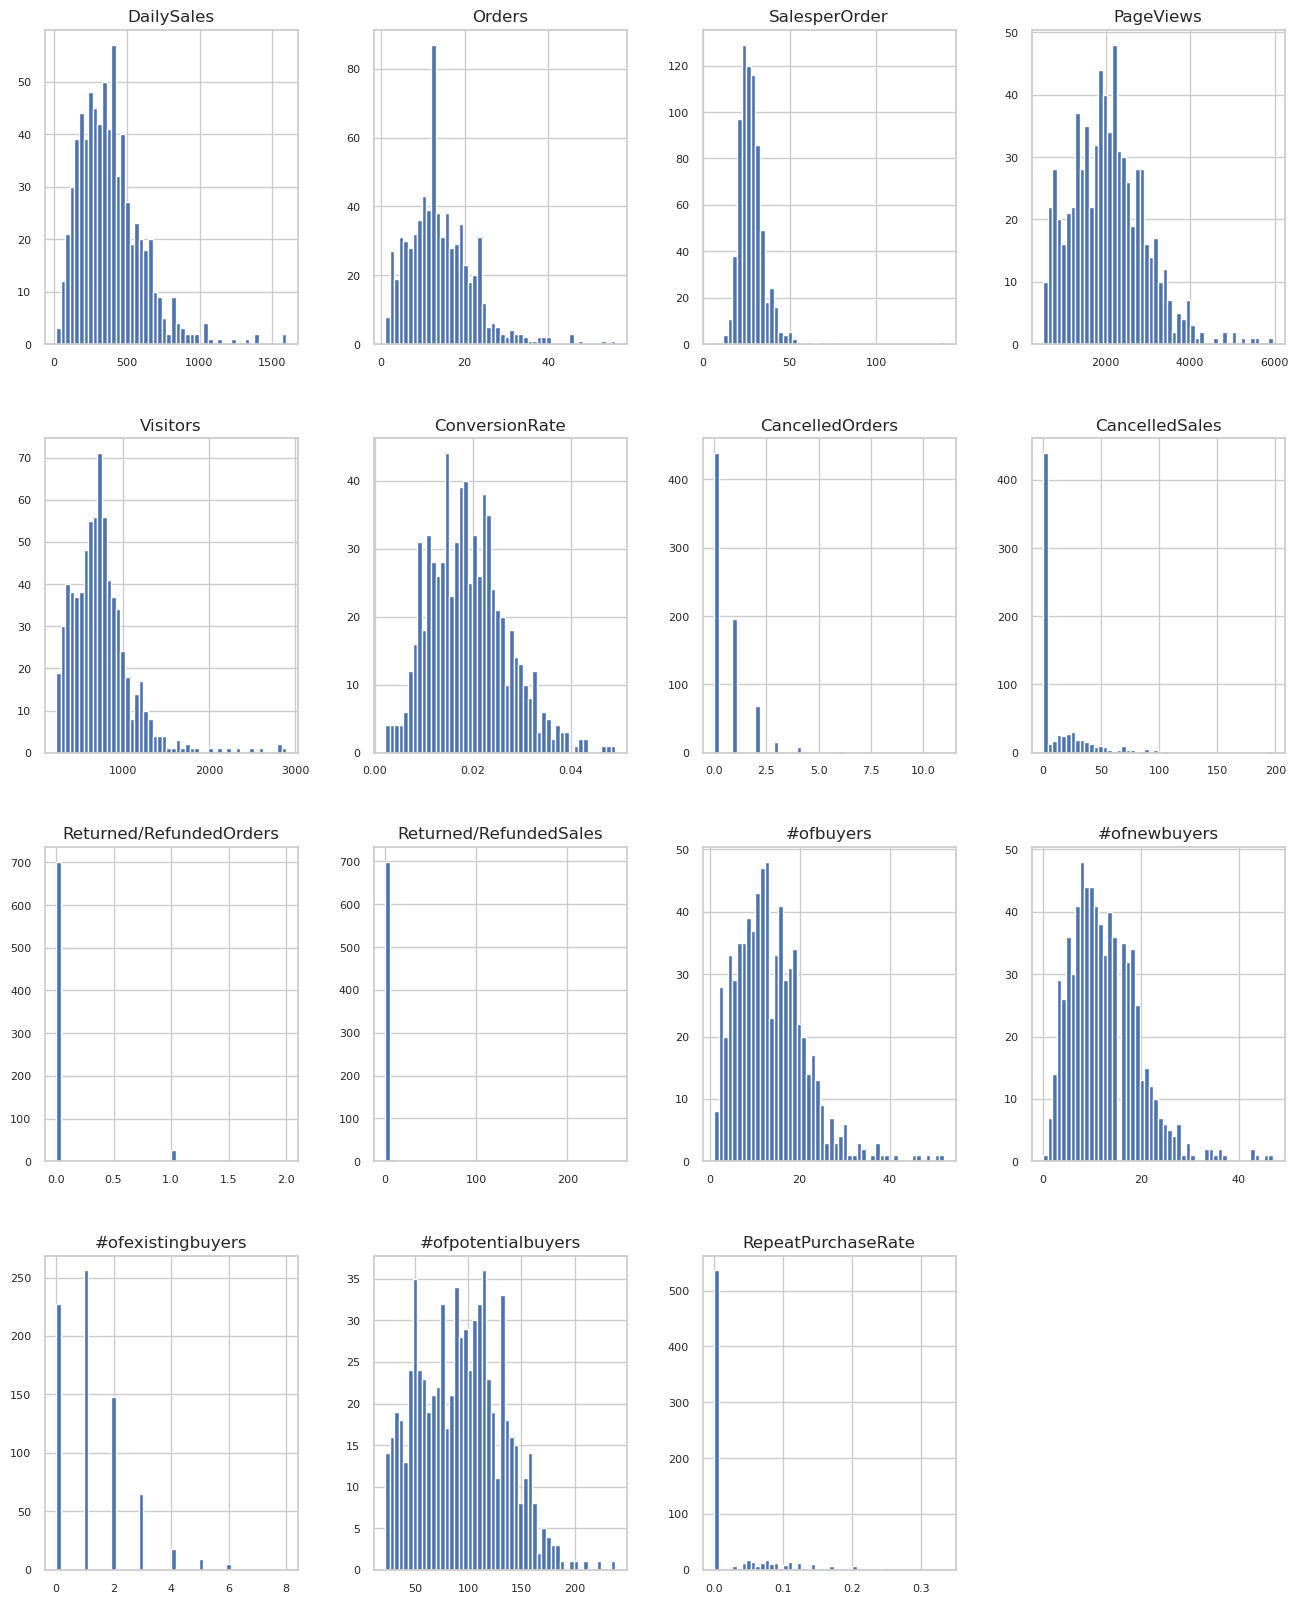

In [16]:
df_num.hist(figsize=(16, 20), bins=50,xlabelsize=8, ylabelsize=8); # ; avoid having the matplotlib verbose informations

<font color='chocolate'>Features such as `Orders`, `SalesperOrder`, `PageViews`, `Visitors`... seems to share a similar distribution to the one we have with `DailySales`. Lets see if we can find new clues later.</font>

Most of the histograms show a right-skewed distribution, which means most of the values are concentrated on the left side of the histogram, with a tail extending to the right. This suggests that for these attributes, most of the values are relatively low, with fewer high-value observations. This is a common pattern in many types of business data.

To further analyze these data and extract meaningful insights, several additional pieces of context could be helpful:

Business Context: Understanding the nature of your business, your products or services, your target market, and your business model can provide crucial context. For example, if you sell a wide range of products with varying prices, this could explain the skewness in the sales data. If your business is seasonal, this could explain variations and outliers in the data.

Specific Events: Knowledge of specific events that occurred during the time period covered by the data can provide valuable context. For example, if there was a major marketing campaign, a website outage, a stock out situation, or a global event like a pandemic, these could significantly impact your data.

Historical Trends: Understanding how your data compares to historical trends can be informative. For example, if sales are typically lower at certain times of the year, this could explain low sales values in your data.

Industry Benchmarks: Comparing your data to industry benchmarks can provide context. For example, if your conversion rates are low compared to industry averages, this could indicate a problem.

Customer Behavior: Information about customer behavior can provide valuable context. For example, understanding how often customers typically make purchases, and how much they typically spend, can help explain patterns in the data.

Competitive Landscape: Understanding what your competitors are doing during the same time period could also provide valuable context. For example, if a competitor ran a major promotion, this could impact your sales.

By considering these additional pieces of context, you can gain a deeper understanding of the patterns and outliers in your data, and make more informed decisions.

## Correlation

Now we'll try to find which features are strongly correlated with DailySales. We'll store them in a var called golden_features_list. We'll reuse our df_num dataset to do so.

In [17]:
df_num_corr = df_num.corr()['DailySales'][1:] # 1 to exclude the Daily Sales itself
golden_features_list = df_num_corr[abs(df_num_corr) > 0.5].sort_values(ascending=False)
print("There is {} strongly correlated values with DailySales:\n{}".format(len(golden_features_list), golden_features_list))

There is 7 strongly correlated values with DailySales:
Orders                0.908368
#ofbuyers             0.895342
#ofnewbuyers          0.873169
PageViews             0.720335
#ofpotentialbuyers    0.624857
Visitors              0.584781
ConversionRate        0.542456
Name: DailySales, dtype: float64


Perfect, we now have a list of strongly correlated values but this list is incomplete as we know that correlation is affected by outliers. So we could proceed as follow:

Plot the numerical features and see which ones have very few or explainable outliers
Remove the outliers from these features and see which one can have a good correlation without their outliers
Btw, correlation by itself does not always explain the relationship between data so ploting them could even lead us to new insights and in the same manner, check that our correlated values have a linear relationship to the SalePrice.

For example, relationships such as curvilinear relationship cannot be guessed just by looking at the correlation value so lets take the features we excluded from our correlation table and plot them to see if they show some kind of pattern.

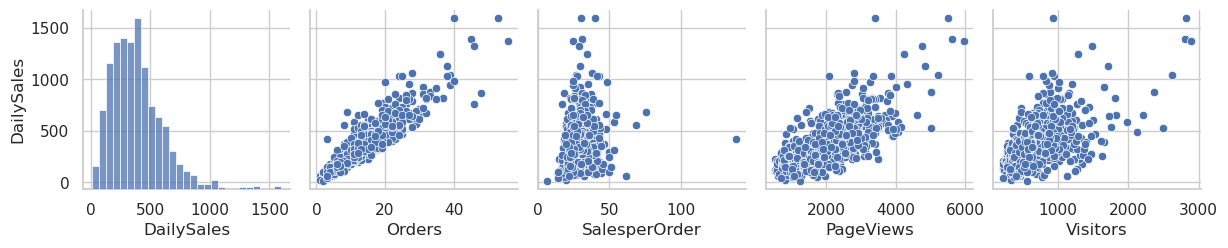

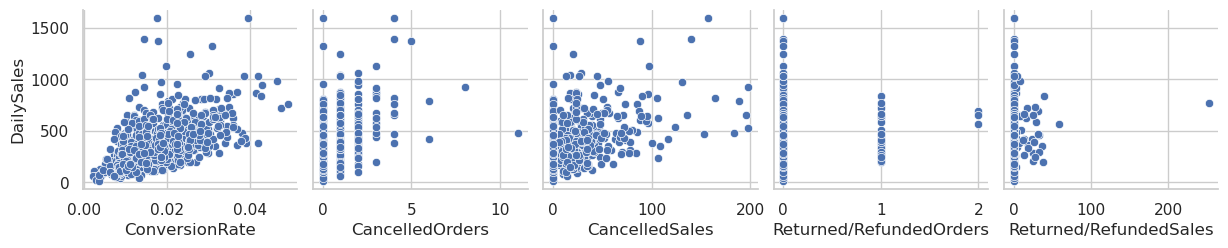

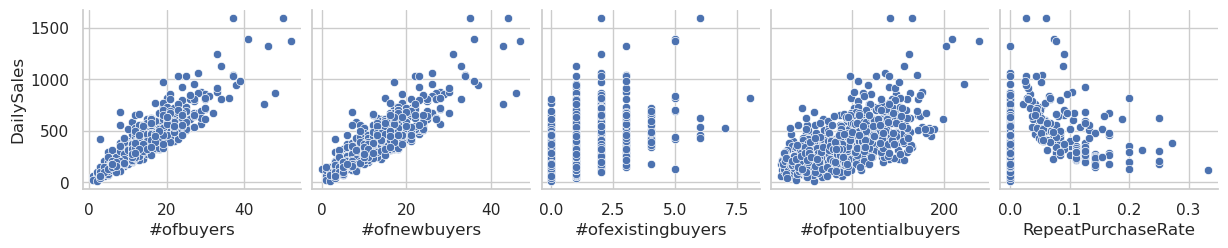

In [18]:
for i in range(0, len(df_num.columns), 5):
    sns.pairplot(data=df_num,
                x_vars=df_num.columns[i:i+5],
                y_vars=['DailySales'])

We can clearly identify some relationships. Most of them seems to have a linear relationship with the DailySales and if we look closely at the data we can see that a lot of data points are located on x = 0 which may indicate the absence of such data.

So now lets remove these 0 values and repeat the process of finding correlated values:

In [19]:
import operator

individual_features_df = []
for i in range(1, len(df_num.columns)): # 1 because the first column is DailySales
    tmpDf = df_num[[df_num.columns[i], 'DailySales']]
    tmpDf = tmpDf[tmpDf[df_num.columns[i]] != 0]
    individual_features_df.append(tmpDf)

all_correlations = {feature.columns[0]: feature.corr()['DailySales'][0] for feature in individual_features_df}
all_correlations = sorted(all_correlations.items(), key=operator.itemgetter(1))
for (key, value) in all_correlations:
    print("{:>15}: {:>15}".format(key, value))

RepeatPurchaseRate: -0.4479185492149484
Returned/RefundedSales: 0.12426842011253346
  SalesperOrder: 0.150991211488181
Returned/RefundedOrders: 0.28160098163905833
#ofexistingbuyers: 0.33827164753506367
CancelledOrders: 0.3494547891333339
 CancelledSales: 0.37070518988149664
 ConversionRate: 0.542455875474615
       Visitors: 0.5847805252027861
#ofpotentialbuyers: 0.6248573944183838
      PageViews: 0.7203349719820027
   #ofnewbuyers: 0.8730447750195162
      #ofbuyers: 0.8953423457620767
         Orders: 0.9083681748341156


It seems like the strongly correlated value is the same by cleaning up the data a bit. Now our golden_features_list var looks like this:

In [20]:
golden_features_list = [key for key, value in all_correlations if abs(value) >= 0.5]
print("There is {} strongly correlated values with DailySales:\n{}".format(len(golden_features_list), golden_features_list))

There is 7 strongly correlated values with DailySales:
['ConversionRate', 'Visitors', '#ofpotentialbuyers', 'PageViews', '#ofnewbuyers', '#ofbuyers', 'Orders']


## Conclusion

<font color='chocolate'> By looking at correlation between numerical values we discovered 7 features which have a strong relationship to Daily Sales. Besides correlation we didn't find any notable pattern on the datas which are not correlated.
    
Notes:

There may be some patterns I wasn't able to identify due to my lack of expertise

## Feature to feature relationship

Trying to plot all the numerical features in a seaborn pairplot will take us too much time and will be hard to interpret. We can try to see if some variables are linked between each other and then explain their relation with common sense.



Text(0.5, 1.0, 'Correlation Heatmap of All Features')

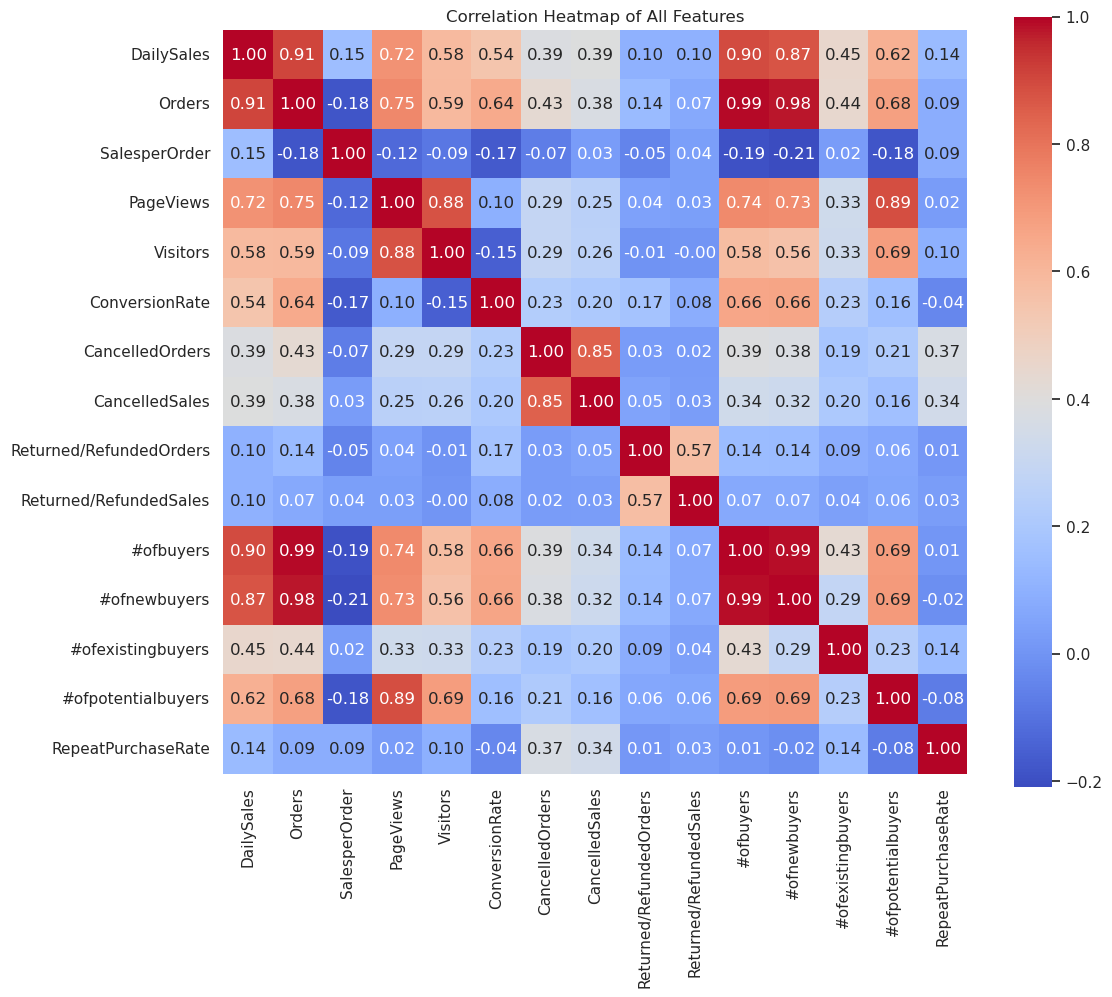

In [21]:
corr = df_num.corr() # We already examined SalePrice correlations
plt.figure(figsize=(12, 10))

sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True);

plt.title('Correlation Heatmap of All Features')

This heatmap provides a visual representation of the correlation between each pair of variables. The color of each square indicates the strength and direction of the correlation: darker red colors represent strong positive correlations, darker blue colors represent strong negative correlations, and colors closer to white represent weaker correlations.

Looking at the heatmap, you can see that there are several variables that are strongly correlated with "Daily Sales", as indicated by the darker red squares. These include "Orders", "# of buyers", "# of new buyers", and "Page Views". This suggests that these variables may be important factors that influence sales.

On the other hand, some variables, such as "Cancelled Orders" and "Cancelled Sales", show very weak correlations with "Daily Sales", as indicated by the lighter colors.

Based on the correlation analysis, several strategies can be suggested to potentially boost sales. However, please keep in mind that these are based on correlational relationships and do not imply causation. Actual results may vary and should be tested and validated:

Increase the Number of Orders: "Orders" have a strong positive correlation with sales, suggesting that increasing the number of orders can boost sales. This can be achieved by various marketing strategies such as:

1) Offering discounts or promotions to encourage more purchases.

2) Upselling and cross-selling to increase the number of items per order.

3) Launching new products or diversifying the product range to attract more customers.

Improve Page Views: There's a strong positive correlation between "Page Views" and sales. Strategies to increase page views might include:

1) Improving Search Engine Optimization (SEO) to increase the visibility of your online store in search engine results.

2) Using social media marketing, content marketing, or pay-per-click advertising to drive more traffic to your site.

3) Improving the user interface and user experience of your website to encourage visitors to explore more pages.

Increase Visitors: There's a moderate positive correlation between "Visitors" and sales. To increase the number of visitors, you could:

1) Use digital marketing strategies to reach more potential customers.

2) Improve the user experience on your site to encourage repeat visits.

3) Partner with other businesses or influencers to reach their audiences.

Improve Conversion Rate: The "Conversion Rate (by paid order)" has a moderate positive correlation with sales. To improve the conversion rate, consider the following strategies:

1) Enhance the website design to make it more user-friendly and persuasive.

2) Provide detailed and appealing product descriptions.

3) Offer various payment options and ensure a secure and easy checkout process.

4) Use retargeting strategies to bring back visitors who did not make a purchase on their first visit.

Remember that it's essential to monitor and evaluate the effectiveness of these strategies. Using A/B testing or other experimental designs can help determine which strategies are most effective. Moreover, it's important to maintain a balance between increasing sales and maintaining profitability. Some strategies, such as offering discounts, can boost sales but also reduce profit margins. Therefore, these decisions should be made carefully, considering the overall business strategy and objectives.